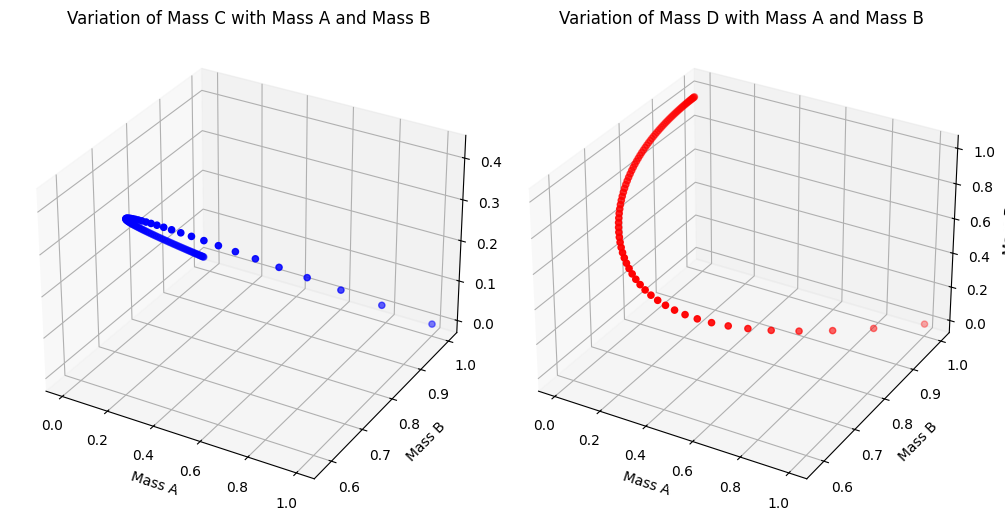

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv("archive (5)/completion/train.csv")

# Extract data
mass_a = data["mass A"]
mass_b = data["mass B"]
mass_c = data["mass C"]
mass_d = data["mass D"]

# Create 3D scatter plot for mass C
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(mass_a, mass_b, mass_c, c='b', marker='o')
ax.set_xlabel('Mass A')
ax.set_ylabel('Mass B')
ax.set_zlabel('Mass C')
ax.set_title('Variation of Mass C with Mass A and Mass B')

# Create 3D scatter plot for mass D
ax = fig.add_subplot(122, projection='3d')
ax.scatter(mass_a, mass_b, mass_d, c='r', marker='o')
ax.set_xlabel('Mass A')
ax.set_ylabel('Mass B')
ax.set_zlabel('Mass D')
ax.set_title('Variation of Mass D with Mass A and Mass B')

plt.tight_layout()
plt.show()



In [2]:
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
training_data = pd.read_csv("archive (5)/completion/train.csv")
testing_data = pd.read_csv("archive (5)/completion/test.csv")

# Split the data into features (X) and targets (y)
X_train = training_data[["mass A", "mass B"]]  # Features for training
y_train = training_data[["mass C", "mass D"]]  # Targets for training

# Split the test data into features (X) and targets (y)
X_test = testing_data[["mass A", "mass B"]]  # Features for testing
y_test = testing_data[["mass C", "mass D"]]  # Targets for testing

# Initialize the linear regression model
base_model = LinearRegression()

# Create a multi-output regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions:")
print(y_pred)


Predictions:
[[ 0.00000000e+00 -5.55111512e-16]
 [ 5.00000000e-02  5.00000000e-02]
 [ 9.38750000e-02  9.51250000e-02]
 [ 1.32524618e-01  1.36121493e-01]
 [ 1.66681169e-01  1.73591160e-01]
 [ 1.96947243e-01  2.08024262e-01]
 [ 2.23823477e-01  2.39824177e-01]
 [ 2.47729421e-01  2.69325709e-01]
 [ 2.69019424e-01  2.96808947e-01]
 [ 2.87994889e-01  3.22509897e-01]
 [ 3.04913837e-01  3.46628718e-01]
 [ 3.19998458e-01  3.69336185e-01]
 [ 3.33441115e-01  3.90778803e-01]
 [ 3.45409177e-01  4.11082893e-01]
 [ 3.56048934e-01  4.30357880e-01]
 [ 3.65488794e-01  4.48698963e-01]
 [ 3.73841908e-01  4.66189297e-01]
 [ 3.81208355e-01  4.82901791e-01]
 [ 3.87676949e-01  4.98900594e-01]
 [ 3.93326761e-01  5.14242330e-01]
 [ 3.98228401e-01  5.28977139e-01]
 [ 4.02445100e-01  5.43149548e-01]
 [ 4.06033633e-01  5.56799209e-01]
 [ 4.09045111e-01  5.69961527e-01]
 [ 4.11525650e-01  5.82668194e-01]
 [ 4.13516962e-01  5.94947647e-01]
 [ 4.15056855e-01  6.06825464e-01]
 [ 4.16179671e-01  6.18324702e-01]
 [ 4.16

Mean Squared Error for Mass C: 3.1354320050556487e-32
Mean Squared Error for Mass D: 3.081661244714572e-31
R^2 Score for Mass C: 1.0
R^2 Score for Mass D: 1.0


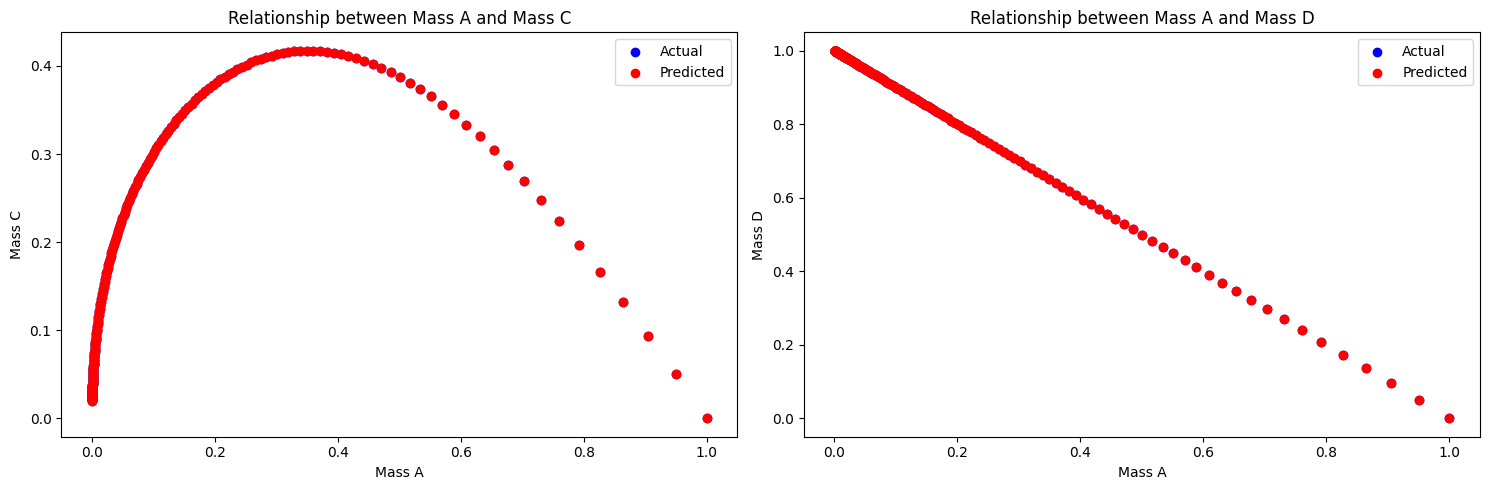

In [3]:
# Calculate mean squared error for each target
mse_c = mean_squared_error(y_test["mass C"], y_pred[:, 0])
mse_d = mean_squared_error(y_test["mass D"], y_pred[:, 1])

print("Mean Squared Error for Mass C:", mse_c)
print("Mean Squared Error for Mass D:", mse_d)

# Calculate R^2 score for each target
r2_c = r2_score(y_test["mass C"], y_pred[:, 0])
r2_d = r2_score(y_test["mass D"], y_pred[:, 1])

print("R^2 Score for Mass C:", r2_c)
print("R^2 Score for Mass D:", r2_d)

# Plot the regression graph
plt.figure(figsize=(15, 5))

# Plot the relationship between mass A and mass C
plt.subplot(1, 2, 1)
plt.scatter(X_test["mass A"], y_test["mass C"], color='blue', label='Actual')
plt.scatter(X_test["mass A"], y_pred[:, 0], color='red', label='Predicted')
plt.xlabel("Mass A")
plt.ylabel("Mass C")
plt.title("Relationship between Mass A and Mass C")
plt.legend()

# Plot the relationship between mass A and mass D
plt.subplot(1, 2, 2)
plt.scatter(X_test["mass A"], y_test["mass D"], color='blue', label='Actual')
plt.scatter(X_test["mass A"], y_pred[:, 1], color='red', label='Predicted')
plt.xlabel("Mass A")
plt.ylabel("Mass D")
plt.title("Relationship between Mass A and Mass D")
plt.legend()

plt.tight_layout()
plt.show()

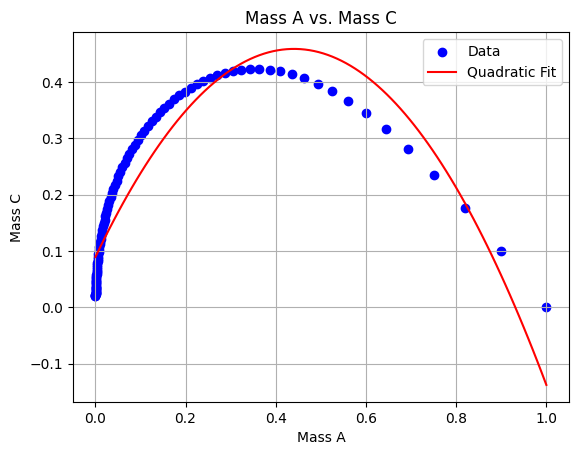

In [5]:
import numpy as np

# Extract "Mass A" and "Mass C" data
mass_a = data["mass A"]
mass_c = data["mass C"]

# Fit a quadratic function to the data
coefficients = np.polyfit(mass_a, mass_c, 2)  # Fit a quadratic function (2nd degree polynomial)

# Generate values for the quadratic function
x_values = np.linspace(min(mass_a), max(mass_a), 100)
y_values = np.polyval(coefficients, x_values)

# Plot the original data
plt.scatter(mass_a, mass_c, color='blue', label='Data')

# Plot the fitted quadratic function
plt.plot(x_values, y_values, color='red', label='Quadratic Fit')

plt.title("Mass A vs. Mass C")
plt.xlabel("Mass A")
plt.ylabel("Mass C")
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error for Mass C: 1.6166834387981794e-05
Mean Squared Error for Mass D: 5.062754851820612e-05
R^2 Score for Mass C: 0.9991514964181362
R^2 Score for Mass D: 0.9989543959718026


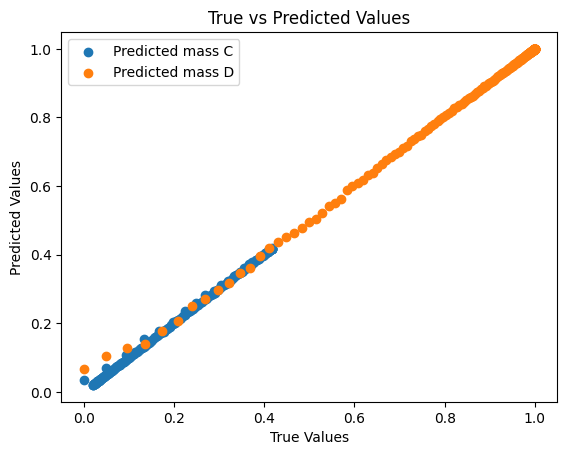

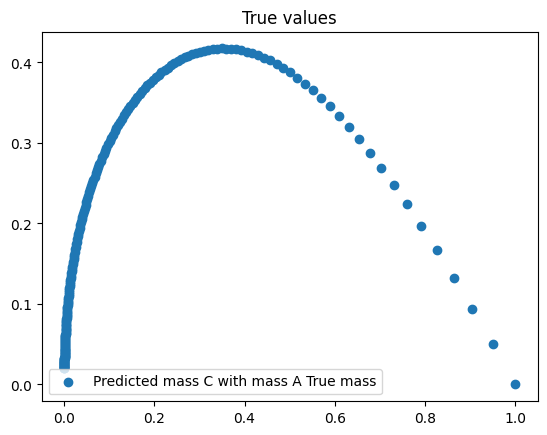

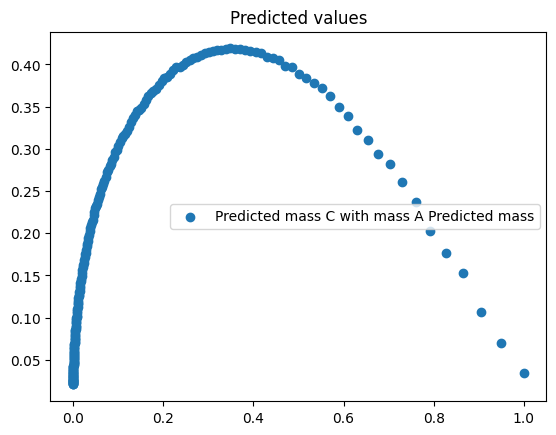

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize the random forest regressor model
base_model = RandomForestRegressor()

# Create a multi-output regression model
model = MultiOutputRegressor(base_model)

# Train the model
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
# Calculate mean squared error for each target
mse_c = mean_squared_error(y_test["mass C"], y_pred[:, 0])
mse_d = mean_squared_error(y_test["mass D"], y_pred[:, 1])

print("Mean Squared Error for Mass C:", mse_c)
print("Mean Squared Error for Mass D:", mse_d)

# Calculate R^2 score for each target
r2_c = r2_score(y_test["mass C"], y_pred[:, 0])
r2_d = r2_score(y_test["mass D"], y_pred[:, 1])

print("R^2 Score for Mass C:", r2_c)
print("R^2 Score for Mass D:", r2_d)




import matplotlib.pyplot as plt

# Assuming y_pred is a 2D array with predicted values for "mass C" and "mass D"
plt.scatter(y_test["mass C"], y_pred[:, 0], label="Predicted mass C")
plt.scatter(y_test["mass D"], y_pred[:, 1], label="Predicted mass D")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.show()

plt.scatter(X_test["mass A"],y_test["mass C"],label="Predicted mass C with mass A True mass")
plt.title("True values")
plt.legend()
plt.show()

plt.scatter(X_test["mass A"],y_pred[:, 0],label="Predicted mass C with mass A Predicted mass")
plt.title("Predicted values")
plt.legend()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error for Mass C: 2.1883544656773588e-05
Mean Squared Error for Mass D: 2.3476479291851477e-05
R^2 Score for Mass C: 0.9988939512227509
R^2 Score for Mass D: 0.9995242111538947


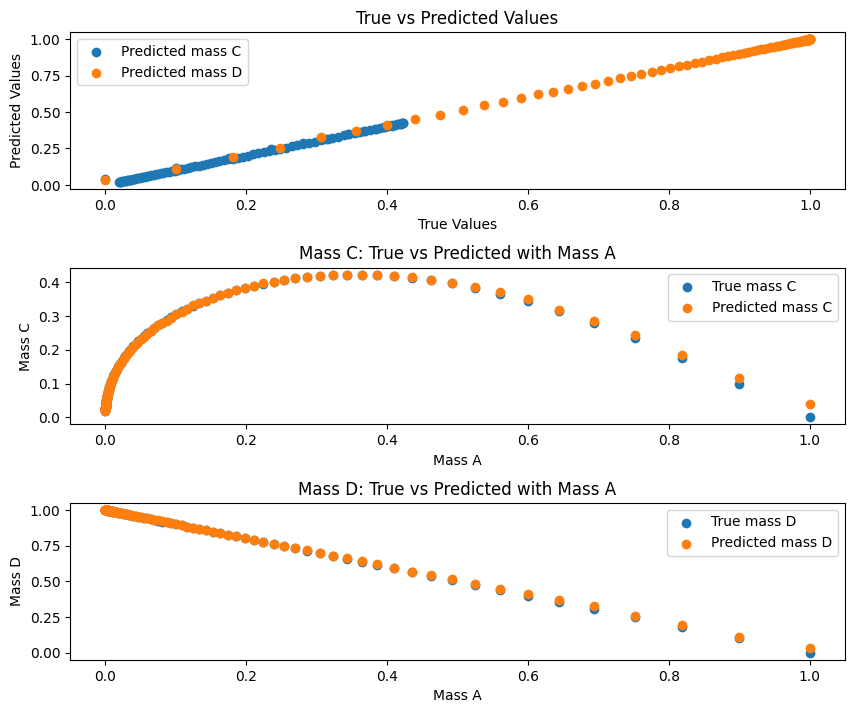

In [20]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load the dataset and train the models
training_data = pd.read_csv("archive (5)/completion/train.csv")
X_train = training_data[["mass A", "mass B"]]
y_train_c = training_data["mass C"]
y_train_d = training_data["mass D"]

base_model = RandomForestRegressor()
model = MultiOutputRegressor(base_model)
model.fit(X_train, y_train)

# Function to predict mass C and mass D for new data
def predict_mass():
    try:
        mass_a = float(mass_a_entry.get())
        mass_b = float(mass_b_entry.get())
        mass_c_pred, mass_d_pred = predict(mass_a, mass_b)
        result_label.config(text=f"Predicted Mass C: {mass_c_pred:.2f}\nPredicted Mass D: {mass_d_pred:.2f}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for mass A and mass B")

# Function to predict mass C and mass D using the trained models
def predict(mass_a, mass_b):
    new_data = np.array([[mass_a, mass_b]])
    return model.predict(new_data)[0]

# Function to open a new window and display the graphs
def show_graphs():
    # Predict on testing data
    y_pred = model.predict(X_train)

    # Calculate mean squared error for each target
    mse_c = mean_squared_error(y_train_c, y_pred[:, 0])
    mse_d = mean_squared_error(y_train_d, y_pred[:, 1])

    print("Mean Squared Error for Mass C:", mse_c)
    print("Mean Squared Error for Mass D:", mse_d)

    # Calculate R^2 score for each target
    r2_c = r2_score(y_train_c, y_pred[:, 0])
    r2_d = r2_score(y_train_d, y_pred[:, 1])

    print("R^2 Score for Mass C:", r2_c)
    print("R^2 Score for Mass D:", r2_d)

    # Plotting
    fig, axs = plt.subplots(3, figsize=(10, 15))

    axs[0].scatter(y_train_c, y_pred[:, 0], label="Predicted mass C")
    axs[0].scatter(y_train_d, y_pred[:, 1], label="Predicted mass D")
    axs[0].set_xlabel("True Values")
    axs[0].set_ylabel("Predicted Values")
    axs[0].set_title("True vs Predicted Values")
    axs[0].legend()

    axs[1].scatter(X_train["mass A"], y_train_c, label="True mass C")
    axs[1].scatter(X_train["mass A"], y_pred[:, 0], label="Predicted mass C")
    axs[1].set_xlabel("Mass A")
    axs[1].set_ylabel("Mass C")
    axs[1].set_title("Mass C: True vs Predicted with Mass A")
    axs[1].legend()

    axs[2].scatter(X_train["mass A"], y_train_d, label="True mass D")
    axs[2].scatter(X_train["mass A"], y_pred[:, 1], label="Predicted mass D")
    axs[2].set_xlabel("Mass A")
    axs[2].set_ylabel("Mass D")
    axs[2].set_title("Mass D: True vs Predicted with Mass A")
    axs[2].legend()

    plt.subplots_adjust(hspace=0.5)
    # Embedding plots into tkinter window
    graph_window = tk.Toplevel(root)
    graph_window.title("Graphs")
    canvas = FigureCanvasTkAgg(fig, master=graph_window)
    canvas.draw()
    canvas.get_tk_widget().pack
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1, padx=10, pady=15)  


# Create the GUI
root = tk.Tk()
root.title("Mass Prediction")

# Styling
root.configure(bg="#f0f0f0")
root.geometry("300x250")

# Create input fields
mass_a_label = tk.Label(root, text="Mass A:", bg="#f0f0f0")
mass_a_label.grid(row=0, column=0, padx=10, pady=5)
mass_a_entry = tk.Entry(root)
mass_a_entry.grid(row=0, column=1, padx=10, pady=5)

mass_b_label = tk.Label(root, text="Mass B:", bg="#f0f0f0")
mass_b_label.grid(row=1, column=0, padx=10, pady=5)
mass_b_entry = tk.Entry(root)
mass_b_entry.grid(row=1, column=1, padx=10, pady=5)

# Create predict button
predict_button = tk.Button(root, text="Predict", command=predict_mass, bg="#4caf50", fg="white", relief="raised", borderwidth=3)
predict_button.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

# Create show graphs button
graph_button = tk.Button(root, text="Show Graphs", command=show_graphs, bg="#2196f3", fg="white", relief="raised", borderwidth=3)
graph_button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

# Create label for displaying result
result_label = tk.Label(root, text="", bg="#f0f0f0", justify="left")
result_label.grid(row=4, column=0, columnspan=2, padx=10, pady=5)

root.mainloop()
